In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine,inspect, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
#inspect hawaii.sqlite file
#inspector=inspect(engine)
#inspector.get_table_names()

# reflect an existing database into a new model
Base=automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Station=Base.classes.station
Measurement=Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
#find the column names
inspector=inspect(engine)
columns=inspector.get_columns('measurement')
for column in columns:
    print(column['name'],column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
# Find the most recent date in the data set.
latestDate=session.query(Measurement).order_by(Measurement.date.desc()).first().date
print(f"{latestDate} is the most recent date in the data set.")

2017-08-23 is the most recent date in the data set.


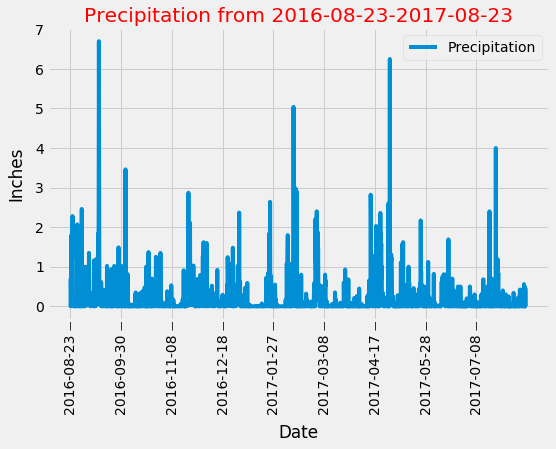

<Figure size 432x288 with 0 Axes>

In [11]:
##### Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

oneYearAgoDate=dt.date(2017,8,23)-dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
oneYearPrec=session.query(Measurement.date,Measurement.prcp)\
.filter(Measurement.date>=oneYearAgoDate).order_by(Measurement.date.desc())

# Save the query results as a Pandas DataFrame and set the index to the date column

prec_df=pd.DataFrame(oneYearPrec)
prec_df.set_index('date',inplace=True)

# Sort the dataframe by date

prec_df.sort_values('date',inplace=True)
prec_df.rename(columns={'prcp':'Precipitation'},inplace=True)
prec_df.dropna(inplace=True)


# Use Pandas Plotting with Matplotlib to plot the data

col_length=len(prec_df.iloc[::])#finds the length for the x-axis
col_div=int(round(col_length/9,0)) #finds the number to divide into col_length to get 9 ticks

ax=prec_df.plot(kind="line",rot='vertical',figsize=(8,5))#plots the graph

ax.set_xticks(range(0,col_length,1)[::col_div])#sets the xticks divided into 9 places
ax.set_xticklabels(prec_df.index[::col_div], rotation='vertical')#sets they x label into 9 places

#formats the graph
ax.set_ylabel("Inches",labelpad=10)
ax.set_xlabel("Date",labelpad=10)
ax.set_title(f"Precipitation from {oneYearAgoDate}-{latestDate}",color='red')
ax.xaxis.set_tick_params(length=10)

plt.show()
plt.tight_layout()

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
total_rain=round(np.sum(prec_df['Precipitation']),2)
mean_rain=round(np.mean(prec_df['Precipitation']),2)
median_rain=round(np.median(prec_df['Precipitation']),2)
std_rain=round(np.std(prec_df['Precipitation']),2)
min_rain=np.min(prec_df['Precipitation'])
#quartile1=prec_df.quantile(.25)
#quartile2=prec_df.quantile(.50)
#quartile3=prec_df.quantile(.75)
max_rain=np.max(prec_df['Precipitation'])

#prints the summary
print()
print(f"Precipitation from {oneYearAgoDate}-{latestDate}")
print('----------------------------------------')
print(f"total:  {total_rain}")
print(f"mean:  {mean_rain}")
print(f"median:  {median_rain}")
print(f"std:  {std_rain}")
print(f"min:  {min_rain}")
#print(f"25%:  {quartile1[0]}")
#print(f"50%:  {quartile2[0]}")
#print(f"75%:  {quartile3[0]}")
print(f"max:  {max_rain}")
print()


Precipitation from 2016-08-23-2017-08-23
----------------------------------------
total:  358.28
mean:  0.18
median:  0.02
std:  0.46
min:  0.0
max:  6.7



In [13]:
#find the column names
columns=inspector.get_columns('station')
for column in columns:
    print(column['name'],column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [36]:
# Design a query to calculate the total number stations in the dataset
stationCount=session.query(Station.station).distinct().count()
print(f"There are {stationCount} stations in the data set.")

There are 9 stations in the data set.


In [109]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

ActiveStations=session.query(func.count('id'),Measurement.station).group_by('station').order_by(func.count('id').desc()).all()

#print out results
print()
print('Most Active Stations')
print('--------------------')
ActiveStations



Most Active Stations
--------------------


[(2772, 'USC00519281'),
 (2724, 'USC00519397'),
 (2709, 'USC00513117'),
 (2669, 'USC00519523'),
 (2612, 'USC00516128'),
 (2202, 'USC00514830'),
 (1979, 'USC00511918'),
 (1372, 'USC00517948'),
 (511, 'USC00518838')]

In [106]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram



In [ ]:
aa=pd.DataFrame(session.query(Measurement.id,Measurement.date,Measurement.station,Measurement.prcp,Measurement.tobs))
#aa.groupby('station').count()
aa.groupby('station').count()

# Close session

In [ ]:
# Close Session
session.close()